**Pustaka**

In [17]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from skimage.feature import hog
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import cross_val_predict
import pandas as pd

In [7]:
train_data = pd.read_csv('/content/emnist-bymerge-train.csv', header=None)
test_data = pd.read_csv('/content/emnist-bymerge-test.csv', header=None)

In [8]:
X_train = train_data.iloc[:, 1:].values.reshape(-1, 28, 28).astype('float32')  # Semua kolom kecuali yang pertama (label)
y_train = train_data.iloc[:, 0].values.astype('int')    # Kolom pertama adalah label
X_test = test_data.iloc[:, 1:].values.reshape(-1, 28, 28).astype('float32')
y_test = test_data.iloc[:, 0].values.astype('int')

In [9]:
max_samples = 1000
if len(X_train) > max_samples:
    X_train = X_train[:max_samples]
    y_train = y_train[:max_samples]

In [10]:
max_samples = 1000
if len(X_train) > max_samples:
    X_test = X_test[:max_samples]
    y_test = y_test[:max_samples]

In [11]:
hog_features_train = []
hog_images_train = []
for image in X_train:
    feature, hog_img = hog(image.reshape((28, 28)),
                           orientations = 9,
                           pixels_per_cell = (8,8),
                           cells_per_block = (2,2),
                           visualize = True,
                           block_norm = 'L2')
    hog_features_train.append(feature)
    hog_images_train.append(hog_img)

hog_features_train_np = np.array(hog_features_train)
hog_images_train_np = np.array(hog_images_train)

In [12]:
hog_features_test = []
hog_images_test = []
for image in X_test:
    feature, hog_img = hog(image.reshape((28, 28)),
                           orientations = 9,
                           pixels_per_cell = (8,8),
                           cells_per_block = (2,2),
                           visualize = True,
                           block_norm = 'L2')
    hog_features_test.append(feature)
    hog_images_test.append(hog_img)

hog_features_test_np = np.array(hog_features_test)
hog_images_test_np = np.array(hog_images_test)

In [13]:
scaler = StandardScaler()
hog_features_train_scaled = scaler.fit_transform(hog_features_train_np)
hog_features_test_scaled = scaler.transform(hog_features_test_np)

In [19]:
loo = LeaveOneOut()
clf = svm.SVC(kernel='rbf', C=1, gamma='scale')
clf.fit(hog_features_train_scaled, y_train)
y_pred = cross_val_predict(clf, hog_features_train_scaled, y_train, cv=loo)

In [20]:
loo_confusion_matrix = confusion_matrix(y_train, y_pred)
loo_accuracy = cross_val_score(clf, hog_features_train_scaled, y_train, cv=loo, scoring='accuracy').mean()
loo_precision = cross_val_score(clf, hog_features_train_scaled, y_train, cv=loo, scoring='precision_weighted').mean()
loo_recall = cross_val_score(clf, hog_features_train_scaled, y_train, cv=loo, scoring='recall_weighted').mean()
loo_f1 = cross_val_score(clf, hog_features_train_scaled, y_train, cv=loo, scoring='f1_weighted').mean()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [21]:
print("\nLOOCV Results (Training Data):")
print("LOOCV confusion_matrix:", loo_confusion_matrix)
print("LOOCV Accuracy:", loo_accuracy)
print("LOOCV Precision:", loo_precision)
print("LOOCV Recall:", loo_recall)
print("LOOCV F1 Score:", loo_f1)


LOOCV Results (Training Data):
LOOCV confusion_matrix: [[41  0  0 ...  0  0  0]
 [ 0 50  0 ...  0  0  0]
 [ 0  0 52 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 16  1]
 [ 0  0  1 ...  0  0 16]]
LOOCV Accuracy: 0.625
LOOCV Precision: 0.625
LOOCV Recall: 0.625
LOOCV F1 Score: 0.625


In [29]:
def plot_combined(X_train, hog_images_train):
    fig, axes = plt.subplots(2, 10, figsize=(10, 5))
    class_name = y_train  # Assuming y_train contains the class labels

    # Plot for dataset images
    for i in range(min(len(X_train), 10)):
        axes[0, i].imshow(X_train[i].reshape((28, 28)), cmap=cm.Greys_r)
        axes[0, i].axis('off')

    # Plot for HOG extraction images
    for i in range(min(len(hog_images_train), 10)):
        axes[1, i].imshow(hog_images_train[i].reshape((28, 28)), cmap=cm.Greys_r)
        axes[1, i].axis('off')

    # Pass the actual confusion matrix data (e.g., loo_confusion_matrix)
    fig, ax = plot_confusion_matrix(conf_mat=loo_confusion_matrix)

    plt.show()

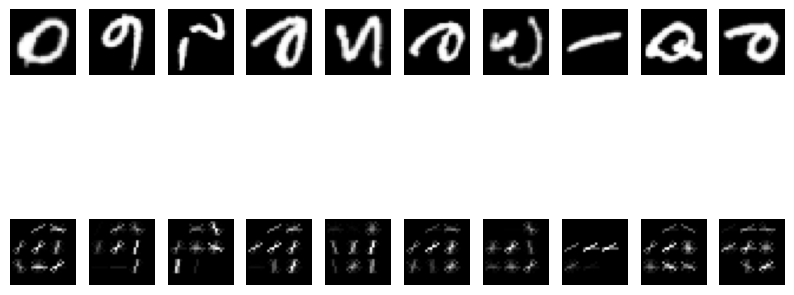

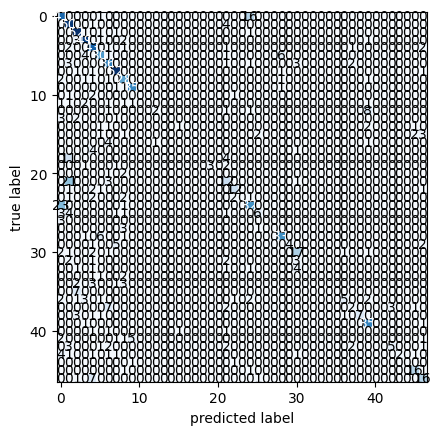

In [30]:
plot_combined(X_train, hog_images_train)

**menampilkan plot matriks untuk data uji dan data latih**

**Dani Muti Aziz (4212201010)**